## Calculating the Return of a Portfolio of Securities

Download data for a portfolio composed of 5 stocks. Do it for British Petroleum, Ford, Exxon, Lincoln, and Apple for the period ‘2000-1-1’ until today.

In [1]:
import yfinance as yf
import pandas as pd
import datetime

start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.now()

tickers = ['BP', 'F', 'XOM', 'LMT', 'AAPL']

data = yf.download(tickers, start=start, end=end)['Close']

print(data.head())

C:\Users\KHA\AppData\Local\Temp\ipykernel_26476\3658184732.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start, end=end)['Close']
[*********************100%***********************]  5 of 5 completed

Ticker          AAPL         BP         F        LMT        XOM
Date                                                           
2002-01-02  0.349734  14.360584  7.119066  24.793589  18.379333
2002-01-03  0.353937  14.366829  7.342909  24.970539  18.407169
2002-01-04  0.355589  14.432315  7.435076  25.340506  18.564978
2002-01-07  0.343731  14.267038  7.241962  25.190369  18.402534
2002-01-08  0.339377  14.092403  7.268295  25.549622  18.425749


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

In [2]:
normalized_data = data / data.iloc[0] * 100

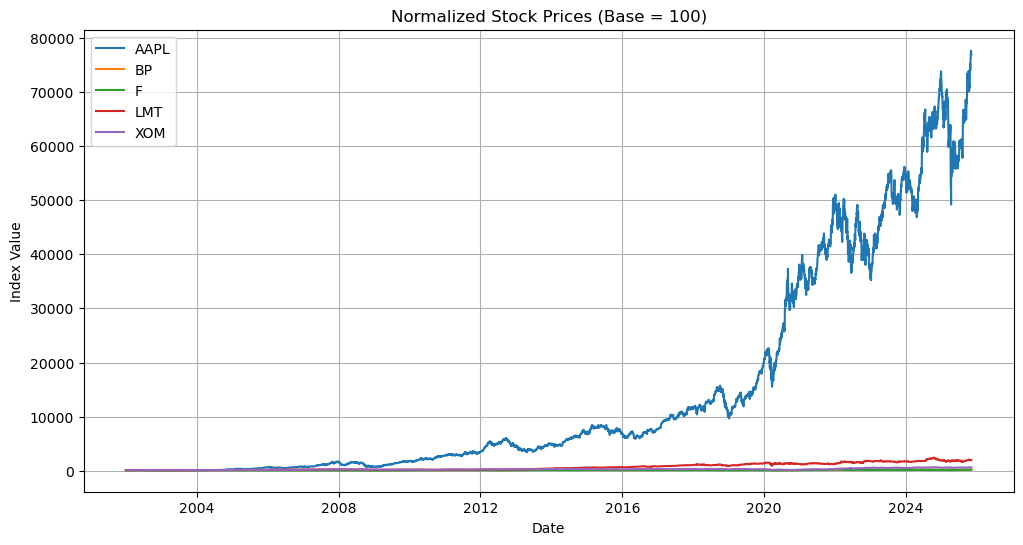

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for column in normalized_data.columns:
    plt.plot(normalized_data.index, normalized_data[column], label=column)

plt.title('Normalized Stock Prices (Base = 100)')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()

Dựa vào biểu đồ này, tôi có thể đưa ra một số nhận xét về hành vi của các cổ phiếu:
Phân tích hành vi cổ phiếu
AAPL (Apple) thể hiện sự tăng trưởng vượt trội và ấn tượng nhất:

Giai đoạn 2003-2012: Tăng trưởng ổn định nhưng chậm
Giai đoạn 2012-2020: Tăng tốc đáng kể, từ khoảng 5,000 lên 20,000
Giai đoạn 2020-2025: Bùng nổ mạnh mẽ, đạt gần 80,000 (tăng gấp 800 lần so với mốc chuẩn!)

BP, F, LMT, XOM hầu như không tăng trưởng:

Dao động quanh mức 100-2,000 trong suốt 20+ năm
LMT có phần tốt hơn với mức tăng nhẹ lên khoảng 2,000-3,000
BP, F, XOM gần như "nằm im" ở mức rất thấp

Có thể tạo danh mục đầu tư hiệu quả không?
Chỉ dựa vào biểu đồ quá khứ là KHÔNG đủ vì:

Bias nhìn lại (Hindsight bias): Dễ thấy AAPL là lựa chọn tốt nhất sau khi nó đã tăng, nhưng vào năm 2003, không ai chắc chắn điều này
Hiệu suất quá khứ ≠ Tương lai: AAPL đã tăng 800 lần - khả năng lặp lại điều này cực kỳ thấp. Các cổ phiếu "thua cuộc" có thể bùng nổ hoặc tiếp tục trì trệ
Thiếu thông tin cơ bản:

Tại sao AAPL tăng? (iPhone, iPad, dịch vụ, hệ sinh thái)
Tại sao BP/F/XOM trì trệ? (Ngành năng lượng hóa thạch suy giảm, cạnh tranh ô tô điện)


Rủi ro tập trung: Bỏ tất cả tiền vào AAPL rất rủi ro - một quyết định sai của Apple có thể làm sụp đổ danh mục

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [4]:
simple_returns = data.pct_change()
print(simple_returns.head())

Ticker          AAPL        BP         F       LMT       XOM
Date                                                        
2002-01-02       NaN       NaN       NaN       NaN       NaN
2002-01-03  0.012017  0.000435  0.031443  0.007137  0.001515
2002-01-04  0.004667  0.004558  0.012552  0.014816  0.008573
2002-01-07 -0.033347 -0.011452 -0.025973 -0.005925 -0.008750
2002-01-08 -0.012665 -0.012240  0.003636  0.014262  0.001261


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [5]:
import numpy as np

n_assets = 5

weights = np.array([1/n_assets] * n_assets)

print("Portfolio Weights:")
print(weights)


Portfolio Weights:
[0.2 0.2 0.2 0.2 0.2]


Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [6]:
annual_returns = simple_returns.mean() * 250
print("Annual Returns of Each Stock:")
print(annual_returns, "\n")

portfolio_annual_return = np.dot(annual_returns, weights) *100
print(f"Portfolio Annual Return: {portfolio_annual_return:.4f} %")

Annual Returns of Each Stock:
Ticker
AAPL    0.333338
BP      0.081313
F       0.111111
LMT     0.151568
XOM     0.109716
dtype: float64 

Portfolio Annual Return: 15.7409 %


Đánh giá lợi nhuận 15.74% mỗi năm
Về mặt số liệu, đây là lợi nhuận RẤT TỐT, nhưng cần xem xét nhiều yếu tố:
Những điểm tích cực:

Vượt trội so với thị trường:

S&P 500 trung bình ~10% mỗi năm trong dài hạn
15.74% cao hơn 57% so với trung bình thị trường


Vượt lạm phát:

Lạm phát trung bình ~2-3%/năm
Lợi nhuận thực tế sau lạm phát vẫn rất cao (~12-13%)


Hiệu quả gộp lãi:

100 triệu VNĐ sau 10 năm → ~430 triệu
Sau 20 năm → ~1.85 tỷ



Những câu hỏi quan trọng cần trả lời:
1. Rủi ro bao nhiêu?

Lợi nhuận cao thường đi kèm độ biến động cao
Bạn có thể chịu được mất 20-30% trong một năm xấu không?
Cần tính Sharpe Ratio để đánh giá hiệu quả điều chỉnh rủi ro

2. Thời gian tính toán?

15.74% tính từ năm nào đến năm nào?
Nếu từ 2003-2025 (bao gồm bull market dài nhất lịch sử) → có thể không lặp lại
Nếu chỉ 5 năm gần đây → có thể do "may mắn"

3. Tỷ trọng AAPL?
AAPL: 33.33% (lợi nhuận cao nhất - 33.33%/năm!)
LMT:  15.16%
F:    11.11%
XOM:  10.97%
BP:    8.13%

Nếu danh mục của bạn nặng AAPL → quá phụ thuộc vào 1 cổ phiếu
AAPL trong quá khứ xuất sắc, nhưng tương lai không chắc chắn